<a href="https://colab.research.google.com/github/ewapajak/ML/blob/main/Penalized_regression_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Analyzing and Plotting Bias in Penalized Regression**

-------------------------------

## **The Question**

**How does varying the regularization parameter $\lambda$ in Ridge and Lasso regression impact the trade-off between bias and variance?**

- Generate a synthetic dataset based on a **known** linear relationship:
  
  $$
  y = \beta_0 + \beta_1 x + \ldots + \epsilon
  $$

  where $$\epsilon \sim \mathcal{N}(0, \sigma^2),$$

  use a **high-dimensional** setting (e.g., 50 predictors) with only a few non-zero true coefficients to emphasize the effects of regularization. I stress, the $\beta_i$ coefficients should be known for this experiment and they should be mostly 0, with only a few non-zero parameters.

- Investigate how increasing $\lambda$ influences the model’s **bias**, **variance**, and **Mean Squared Error (MSE)**.
- Plot **Bias²**, **Variance**, and **MSE** on a single graph for both Ridge and Lasso models.
- Explain MSE decomposition into bias and variance. Read more on the MSE decomposition if you need to.

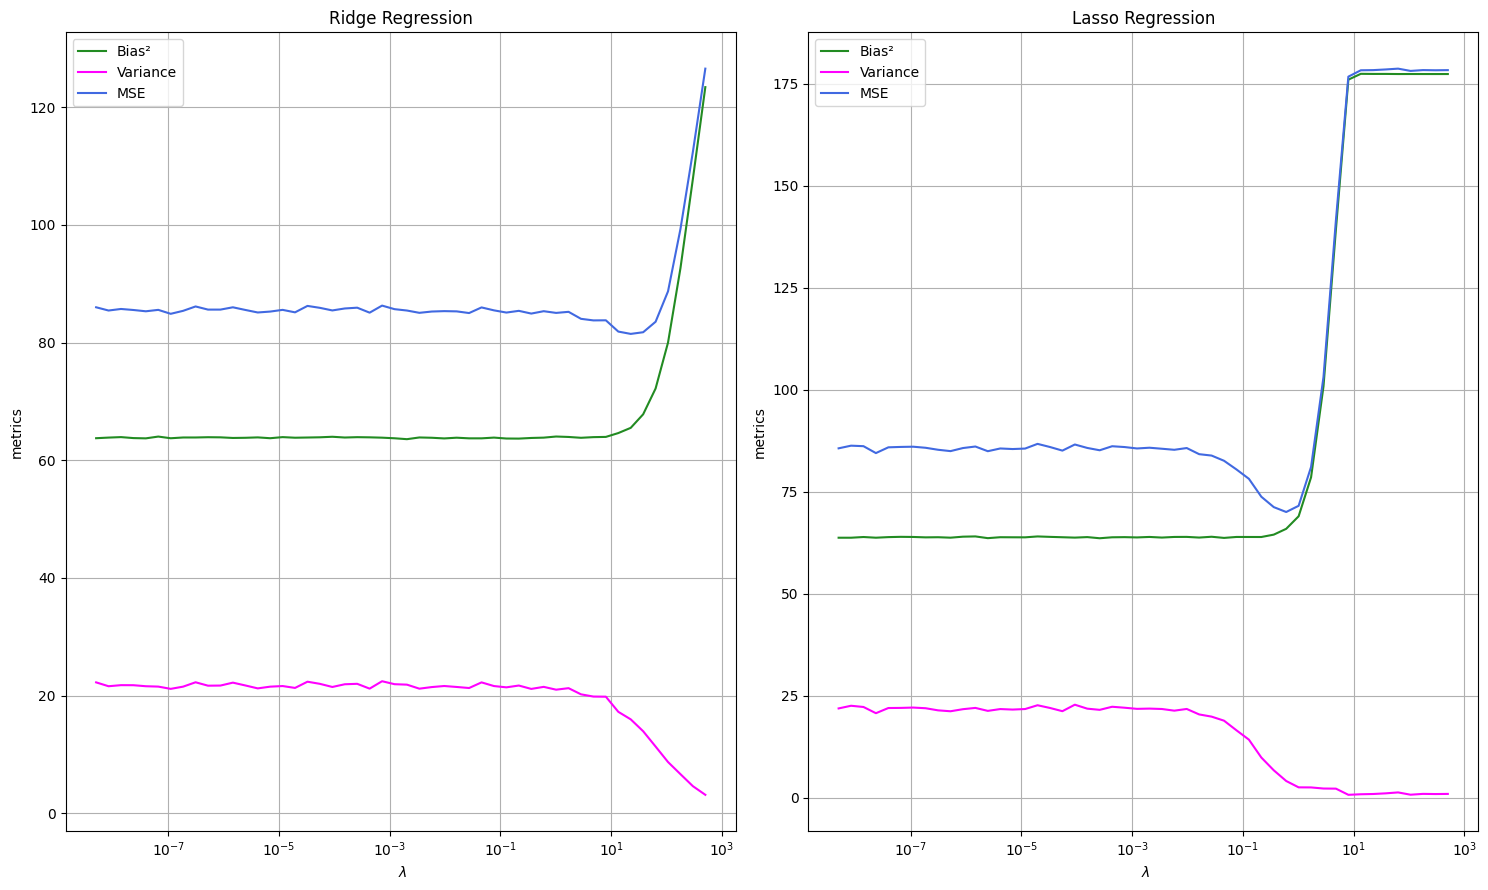

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

np.random.seed(42)

n_features = 50
n_nonzero = 6
sigma = 8.0
n_train = 200
n_test = 5000

true_betas = np.zeros(n_features)
nonzeroind = np.random.choice(n_features, n_nonzero, replace=False)
true_betas[nonzeroind] = np.random.uniform(0.3, 10, n_nonzero)

def generate_data(n_samples,n_features, true_betas, sigma):
  X = np.random.randn(n_samples, n_features)
  y = np.dot(X, true_betas) + np.random.normal(0, sigma, n_samples)
  return X, y


X_test, y_test = generate_data(n_test, n_features, true_betas, sigma)

lambdas = np.logspace(-6,5,50)
alphas = lambdas/n_train
reps = 100

results = {"ridge": {"bias2": [], "variance": [], "mse": []},
    "lasso": {"bias2": [], "variance": [], "mse": []}
}

for type in ["ridge", "lasso"]:
  for alpha in alphas:
    predictions = np.zeros((reps, len(y_test)))

    for rep in range(reps):
      X_train, y_train = generate_data(n_train, n_features, true_betas, sigma)

      if type == "ridge":
        model = Ridge(alpha=alpha)
      elif type == "lasso":
        model = Lasso(alpha=alpha)

      model.fit(X_train, y_train)
      predictions[rep] = model.predict(X_test)


    mean_prediction = np.mean(predictions, axis=0)
    bias2 = np.mean((y_test - mean_prediction)**2)
    variance = np.mean((predictions - mean_prediction)**2)
    mse = np.mean((y_test - predictions)**2)


    results[type]["bias2"].append(bias2)
    results[type]["variance"].append(variance)
    results[type]["mse"].append(mse)

fig, axes = plt.subplots(1,2, figsize=(15,9))
colors = {'bias2': 'forestgreen', 'variance': 'magenta', 'mse': 'royalblue'}
labels = {'bias2': 'Bias²', 'variance': 'Variance', 'mse': 'MSE'}

for i, type in enumerate(["ridge", "lasso"]):
  for metric in ["bias2", "variance", "mse"]:
    axes[i].plot(alphas, results[type][metric], label=labels[metric], color=colors[metric])
  axes[i].set_xscale('log')
  axes[i].set_xlabel(' $\lambda$')
  axes[i].set_ylabel('metrics')
  axes[i].set_title(f'{type.capitalize()} Regression')
  axes[i].grid(True)
  axes[i].legend()

plt.tight_layout()
plt.show()

##**Observations:**
As expected, as $\lambda$ increases:
  - the **variance** decreases
  - the **bias** increases
  - the **MSE** gradually decreases and for large values $\lambda$ the curve starts to exhibit a characteristic U-shape, then drastically increases. This pattern reflects the trade-off between bias and variance. The optimal $\lambda$ exists at the point where MSE reaches its minimum, balancing bias and variance for the best predicitve performance.


#**MSE Decomposition**
Suppose that we have a training set consisting of points $ x_{1},\dots ,x_{n}$, real valued labels $y_{i}$. We assume that the data is generated by a function $f(x)$ such that $y = f(x) + ɛ$ where $ɛ$ is random noise with zero mean and variance $\sigma^2$. The mean squared error can be decomposed as follows:


$$
\text{MSE} = \left( f(x) - \mathbb{E} \left[ \hat{f}(x) \right] \right)^2
+ \mathbb{E} \left[ \left( \mathbb{E} \left[ \hat{f}(x) \right] - \hat{f}(x) \right)^2 \right] + \sigma^2
$$

$$
= \text{Bias} \left( \hat{f}(x) \right)^2 + \text{Var} \left[ \hat{f}(x) \right] + \sigma^2
$$

Where $\sigma^2$ is the variance of the random noise.





#**Ridge vs Lasso**:


The choice between the two regularization methods depends on the data, one may outperform the other in different scenarios:

- Feature sparsity: Lasso may outperform Ridge when there are few non-zero coefficients. Lasso may be a better choice as it sets some of the coefficients to exactly zero, while ridge only shrinks them.

- Multicolinearity: Ridge regression may perform better when the predictors are highly correlated, because it shrink all the coefficients together unlike the lasso, which selects only some of the variables and sets them to zero.

